In [1]:
import numpy as np
from sympy import *
from bikewheelcalc import BicycleWheel
from IPython.display import display

init_printing()

## Coordinate system

Cross-section of the rim at $\theta=0$ (bottom of the wheel).

$e_1, u$ lateral vector (points outwards from the drive side)

$e_2, v$ radial inward vector

$e_3, w$ axial vector normal to rim cross-section (CCW)

### Things I like about this coordinate system

- Right-handed coordinate system
- u and phi have the same sign for a gyration of a rim cross-section about the wheel center

### Things I don't like about this coordinate system

- vw, and u-phi coupling are not adjacent
- positive u towards left side of the bike

In [2]:
# setup symbols
s = symbols('s', real=true)

# deformation
u = Function('u')
v = Function('v')
w = Function('w')
phi = Function('phi')

# Distributed loading functions
fu = Function('f_u')
fv = Function('f_v')
fw = Function('f_w')
m = Function('m_phi')

# rim properties
R, EA, EI1, EI2, GJ, EIw, mu, rx, ry, y0 = symbols('R EA EI_1 EI_2 GJ EI_w mu r_x r_y y_0',
                                                   real=true, finite=true,
                                                   positive=true)

t = symbols('t', real=true)  # Average net radial pull per unit length

# spoke properties
ns = symbols('n_s', integer=true, positive=true)
T, EA, ls, alpha = symbols('T, EA, l, alpha', real=true, positive=true)
k_uu, k_vv, k_ww, k_pp = symbols('k_uu k_vv k_ww, k_{\phi\phi}', real=true)
k_uv, k_uw, k_up, k_vw, k_vp, k_wp = symbols('k_uv k_uw k_{u\phi} k_vw k_{v\phi} k_{w\phi}', real=true)

sub_no_k = [(k_uu, 0), (k_vv, 0), (k_ww, 0), (k_pp, 0),
            (k_uv, 0), (k_uw, 0), (k_up, 0), (k_vw, 0), (k_vp, 0), (k_wp, 0)]

# No coupling terms between v-w and u-phi
sub_ij = [(k_uv, 0), (k_uw, 0), (k_vp, 0), (k_wp, 0)]

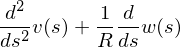

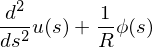

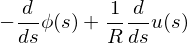

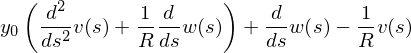

In [3]:
# curvatures
k_1 = v(s).diff(s, 2) + w(s).diff(s)/R
k_2 = u(s).diff(s, 2) + phi(s)/R
k_3 = u(s).diff(s)/R - phi(s).diff(s)
e_mem = w(s).diff(s) - v(s)/R + y0*(v(s).diff(s, 2) + w(s).diff(s)/R)

display(k_1)
display(k_2)
display(k_3)
display(e_mem)

In [4]:
U_rim = (EI1*k_1**2 + EI2*k_2**2 + GJ*k_3**2 + EIw*(k_3.diff(s))**2)/2 + EA*e_mem**2/2

U_spokes = (k_uu*u(s)**2 + 2*k_uv*u(s)*v(s) + 2*k_uw*u(s)*w(s) + 2*k_up*u(s)*phi(s) +
            k_vv*v(s)**2 + 2*k_vw*v(s)*w(s) + 2*k_vp*v(s)*phi(s) +
            k_ww*w(s)**2 + 2*k_wp*w(s)*phi(s) +
            k_pp*phi(s)**2)/2

V_rim = fu(s)*u(s) + fv(s)*v(s) + fw(s)*w(s) + m(s)*phi(s) +\
    R*t*(u(s).diff(s)**2 + rx**2*phi(s).diff(s)**2 +
         ry**2*(u(s).diff(s)/R - phi(s).diff(s))**2 +
         y0*(2*u(s).diff(s, 2)*phi(s).diff(s) - phi(s)**2/R) +
         y0**2*phi(s).diff(s)**2)/2

equil_eqns = euler_equations(U_rim + U_spokes - V_rim, (v(s), w(s), u(s), phi(s)), s)

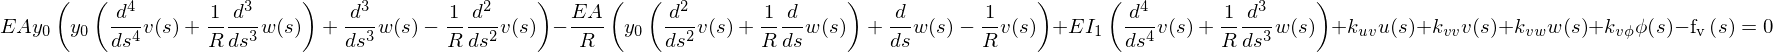

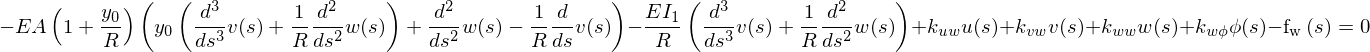

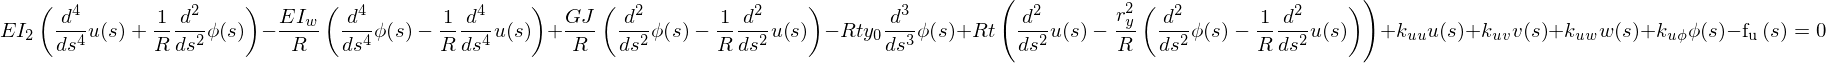

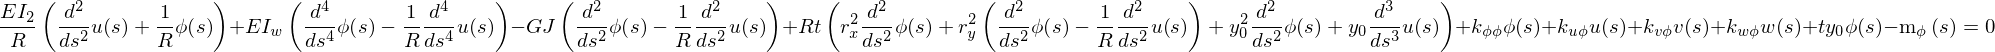

In [5]:
display(equil_eqns[0])
display(equil_eqns[1])
display(equil_eqns[2])
display(equil_eqns[3])

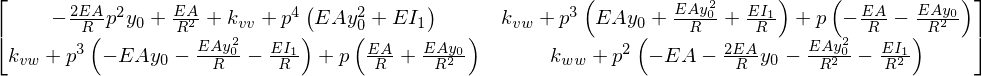

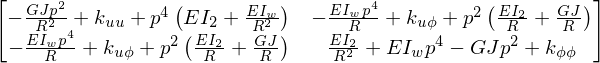

In [6]:
# Simplifying assumptions
sub_R = [(rx, 0), (ry, 0), (y0, 0)]
sub_vw = [(k_uv, 0), (k_uw, 0), (k_vp, 0), (k_wp, 0)]
sub_phi = [(k_up, 0), (k_pp, 0)]
sub_nowarp = [(EIw, 0)]

sym_vars = [v(s), w(s), u(s), phi(s)]
p = symbols('p')

# equil_eqns_simp = [e.subs(sub_R) for e in equil_eqns]

M = zeros(4)
for eq in range(4):
    for var in range(4):
        for o in range(10, -1, -1):
            M[eq, var] = M[eq, var] + equil_eqns[eq].lhs.expand().coeff(Derivative(sym_vars[var], s, o)) * p**o

display(M[[0, 1], [0, 1]].subs(t, 0))
display(M[2:, 2:].subs(t, 0))

In [7]:
if False:
    M_det = M.det()
    display(collect(M_det.expand(), p))

# Lateral-torsional

'Lateral-torsional'

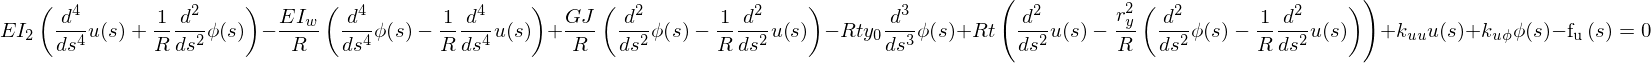

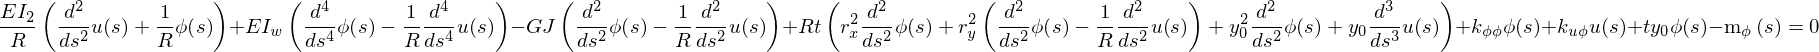

In [8]:
# Simplifying assumptions
sub_rxry = [(rx, 0), (ry, 0), (y0, 0)]
sub_y0 = [(y0, 0)]
sub_r2 = [(rx**2, 0), (ry**2, 0), (y0**2, 0)]
sub_vw = [(k_uv, 0), (k_uw, 0), (k_vp, 0), (k_wp, 0)]
sub_phi = [(k_up, 0), (k_pp, 0)]
sub_nowarp = [(EIw, 0)]

display('Lateral-torsional')
display(equil_eqns[2].subs(sub_vw))
display(equil_eqns[3].subs(sub_vw))

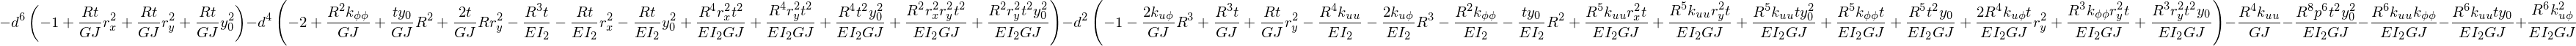

In [9]:
# Convert d/ds to d/dtheta
d = symbols('d', real=True)
sub_d = [(p**n, d**n/R**n) for n in [0, 2, 4, 6]]

eq = (R**6 * (M[2, 2]*M[3, 3] - M[2, 3]*M[3, 2])).subs(sub_d)/(EI2*GJ)

display(-eq.expand().collect(d).subs(sub_nowarp + sub_vw))

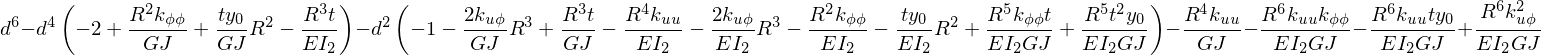

In [10]:
eq = (R**6 * (M[2, 2]*M[3, 3] - M[2, 3]*M[3, 2])).subs(sub_d)/(EI2*GJ)

-eq.expand().collect(d).subs(sub_nowarp + sub_vw + sub_r2)

# Radial-Tangential

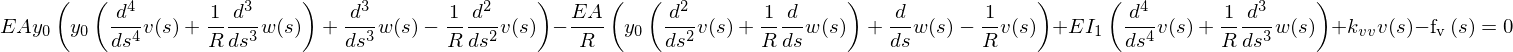

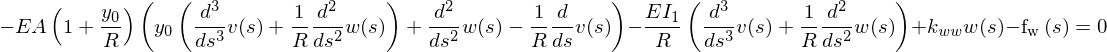

In [11]:
display(equil_eqns[0].subs(sub_ij).subs(k_vw, 0))
display(equil_eqns[1].subs(sub_ij).subs(k_vw, 0))

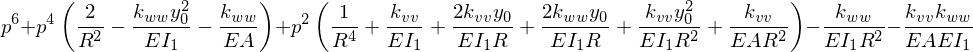

In [12]:
eq = (M[0, 0]*M[1, 1] - M[0, 1]*M[1, 0]).subs(sub_ij).subs(k_vw, 0)

(-eq/(EA*EI1)).simplify().expand().collect(p)

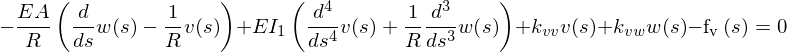

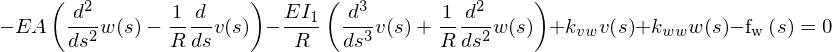

In [13]:
sub_up = [(k_vp, 0), (k_wp, 0)]
sub_R = [(rx, 0), (ry, 0), (y0, 0), (k_uv, 0), (k_uw, 0)]

sub_list = sub_R + sub_up

eq_v = equil_eqns[0].subs(sub_list)
eq_w = equil_eqns[1].subs(sub_list)

display(eq_v)
display(eq_w)

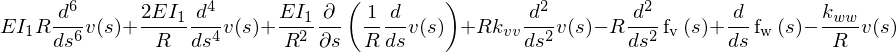

In [14]:
# Combine w and w equations to eliminate EA terms
eq_rad = ((eq_v.lhs.diff(s)*R - eq_w.lhs).simplify()).diff(s)

# Inextensibility criterion: w' = v/R
w_d = v(s)/R

sub_new = [(w(s).diff(s, 5), v(s).diff(s, 4)/R),
           (w(s).diff(s, 2), v(s).diff(s)/R),
           (w(s).diff(s), v(s)/R)]

eq_rad.subs(sub_new)